In [2]:
import numpy as np
from huggingface_hub import from_pretrained_keras
import keras
from PIL import Image

In [3]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sticlaboratory/enlighten-gan-dataset

 99% 758M/766M [00:13<00:00, 97.0MB/s]
100% 766M/766M [00:13<00:00, 58.2MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/enlighten-gan-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [31]:
!ls

enlighten-gan-dataset.zip  kaggle.json	sample_data  testA  testB  trainA  trainB


In [74]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/trainA/100_2.png')
print(img.shape)

(400, 600, 3)


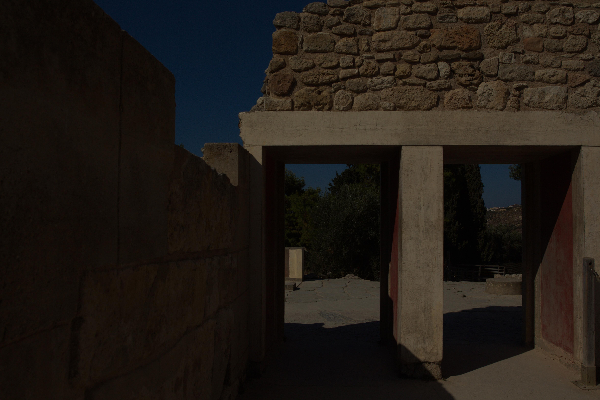

In [75]:
cv2_imshow(img)

In [77]:
low_light_img = Image.open('/content/trainA/100_2.png').convert('RGB')

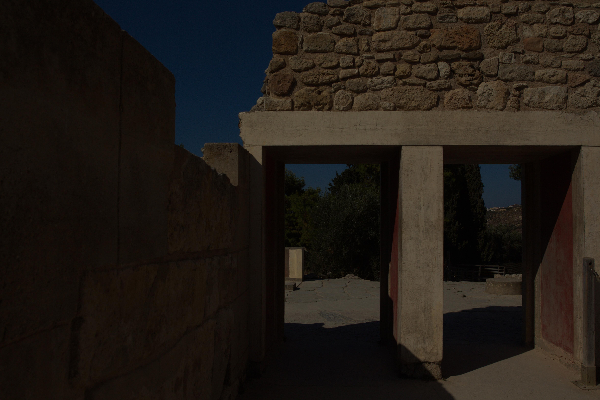

In [78]:
low_light_img

In [79]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)

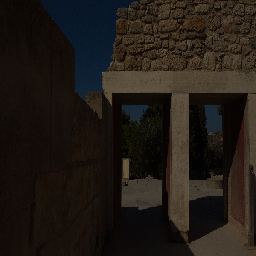

In [80]:
low_light_img

In [81]:
image = keras.preprocessing.image.img_to_array(low_light_img)

In [82]:
image.shape

(256, 256, 3)

In [83]:
image = image.astype('float32') / 255.0

In [84]:
image.shape

(256, 256, 3)

In [85]:
image = np.expand_dims(image, axis = 0)

In [86]:
image.shape

(1, 256, 256, 3)

In [87]:
output = model.predict(image)

1/1 [==============================] - 15s 15s/step


In [88]:
output_image = output[0] * 255.0

In [89]:
output_image.shape

(256, 256, 3)

In [90]:
output_image = output_image.clip(0,255)

In [91]:
output_image.shape

(256, 256, 3)

In [92]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [93]:
output_image

array([[[ 74.470985,  70.6423  ,  58.575523],
        [ 86.735535,  75.961876,  61.483757],
        [ 76.988205,  85.48675 ,  67.02079 ],
        ...,
        [190.23157 , 156.69247 , 126.28274 ],
        [169.73341 , 151.96027 ,  97.758026],
        [135.64717 , 119.097435, 110.05442 ]],

       [[ 83.94292 ,  79.76586 ,  72.92531 ],
        [100.8968  ,  77.79532 ,  67.50154 ],
        [ 92.99931 ,  88.707016,  67.14796 ],
        ...,
        [172.50002 , 148.66272 , 118.78418 ],
        [191.21852 , 163.35544 , 132.74158 ],
        [163.60275 , 150.5141  , 161.44344 ]],

       [[ 87.09047 ,  83.07969 ,  77.88799 ],
        [101.41117 ,  79.73932 ,  63.22395 ],
        [ 95.31614 ,  88.66617 ,  64.087746],
        ...,
        [212.79622 , 214.64912 , 179.42319 ],
        [245.97272 , 221.4646  , 176.91505 ],
        [255.      , 221.0386  , 190.1785  ]],

       ...,

       [[106.172714, 104.775055,  85.39877 ],
        [121.92253 ,  99.02411 ,  74.75232 ],
        [111.83341 ,  

In [94]:
output_image = np.uint32(output_image)

Final Image

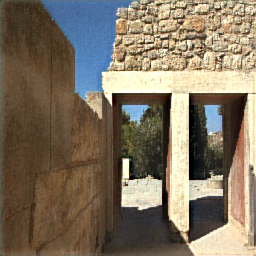

In [95]:
Image.fromarray(output_image.astype('uint8'),'RGB')